## K Nearest Neighbour(KNN)
KNN is a supervised learning algorithm that can be used for both classification and regression tasks. It works
by finding the K most similar instances to a new instance and using their labels to make a prediction.
lazy learning algorithm.

it is a non-parametric 
algorithm 

In [2]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# split the data in X and y
X=df.drop('species',axis=1)
y=df['species']

In [6]:
# load and fit the KNN classifier on the data

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [7]:
new_measurment=np.array([[5.1,3.5,1.4,0.2]])
knn.predict(new_measurment)

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Original')

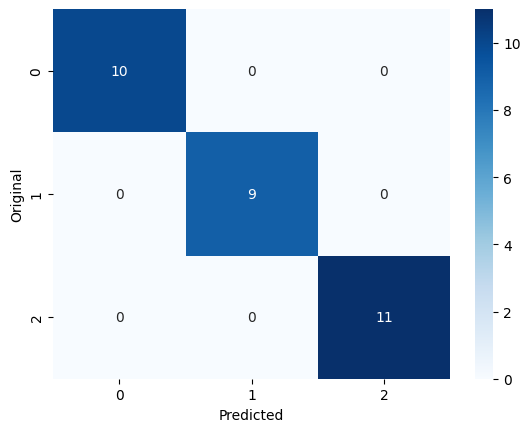

In [8]:
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Original')





## Regreesion using KNN

In [9]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
# split the data 
X=tips.drop('tip',axis=1)
y=tips['tip']

In [11]:
# encode the categorical data using for loop and label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.columns:
    if X[col].dtype == "object" or X[col].dtype == "category":
        X[col] = le.fit_transform(X[col])

In [12]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [13]:
model=KNeighborsRegressor(n_neighbors=5,metric="minkowski",p=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


0.8382265306122448
0.3294034029001649
0.9155471209130881


In [14]:
# predict a specific value
model.predict([[19.82,1,1,0,1,3]])   # its colum data 

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.044])